# Model for Nagpur

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Mental_Health_City = pd.read_csv('Datasheet/MH.Nagpur.Clean.2.csv')

In [5]:
Mental_Health_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     4209 non-null   int64  
 1   Gender                                 4209 non-null   int64  
 2   Age                                    4209 non-null   float64
 3   City                                   4209 non-null   object 
 4   Sleep Duration                         4209 non-null   float64
 5   Dietary Habits                         4209 non-null   float64
 6   Have you ever had suicidal thoughts ?  4209 non-null   int64  
 7   Work/Study Hours                       4209 non-null   float64
 8   Financial Stress                       4209 non-null   float64
 9   Family History of Mental Illness       4209 non-null   int64  
 10  Work                                   4209 non-null   int64  
 11  Sati

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeClassifier # predict proba
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [7]:
model_City = XGBClassifier()

In [8]:
model_City.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.6],
         'colsample_bytree': [0.7],
         'gamma': [0.01],
         'learning_rate': [0.06,0.04,0.02],
         'max_depth':[2,3,4],
         'min_child_weight': [1],
         'n_estimators': [500],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.01,0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [10]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_City,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [11]:
X = Mental_Health_City.drop(columns = ["City","Depression"])
y = Mental_Health_City["Depression"]
City_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.06, max_depth=2, min_child_weight=1, n_estimators=500, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.06, max_depth=2, min_child_weight=1, n_estimators=500, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.06, max_depth=2, min_child_weight=1, n_estimators=500, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   0.1s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.

In [12]:
City_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred_City = City_results.predict(X)
y_pred_City

array([0, 1, 1, ..., 0, 0, 0])

In [14]:
# define a threshold
# threshold = 0.5
# y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [15]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

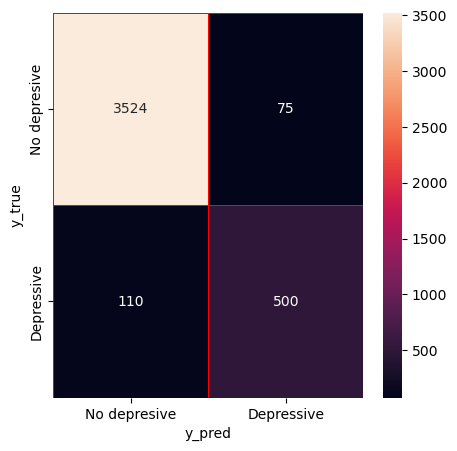

In [16]:
confusion(y,y_pred_City)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred_City)

0.9560465668804942

## Test Nagpur

In [19]:
MH_Test_City = pd.read_csv('Datasheet/MH.Nagpur.Test.Clean.2.csv')
MH_Test_City.head(3)

,id,Gender,Age,City,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work,Satisfaction,Pressure
0,140718,1,49.0,Nagpur,7.5,1.0,0,9.0,3.0,0,1,2.0,4.0
1,140752,0,39.0,Nagpur,4.5,1.0,0,0.0,2.0,0,1,2.0,2.0
2,140790,1,37.0,Nagpur,5.5,0.0,1,10.0,5.0,0,1,1.0,2.0


In [20]:
City_model = City_results.best_estimator_

In [21]:
Prediction_City = City_model.predict(MH_Test_City.drop(columns = ["City"]))

In [22]:
Prediction_City

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
MH_Test_City["Depression"]=Prediction_City

In [24]:
Submission_Nagpur = MH_Test_City[['id','Depression']]
Submission_Nagpur

,id,Depression
0,140718,0
1,140752,0
2,140790,0
3,140799,1
4,140820,0
...,...,...
2743,234195,0
2744,234245,0
2745,234319,0
2746,234351,0


In [25]:
# df_results = result.sort_values(by='id', ascending=True).reset_index(drop=True)

In [26]:
Submission_Nagpur.to_csv('Datasheet/Submission.2.Nagpur.csv', index=False)

